C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


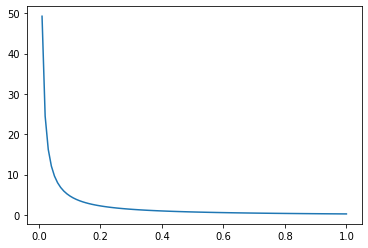

In [3]:
#HW 12 - Brian Kerlin

%matplotlib inline  

# Divergence problem
import matplotlib.pyplot as plt
import numpy as np
from math import pi
#/(np.exp(x)+1)

def f(x):
    return 1/(x)/(np.exp(x)+1)

x = np.linspace(0,1,100)
plt.plot(x, f(x))
plt.show()

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


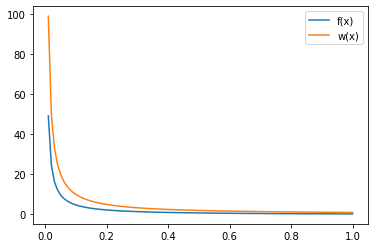

In [4]:
f = lambda x: (1/(x))/(np.exp(x)+1)
w = lambda x: 1/(x)
p = lambda x: 1/(x*np.log(x))

x = np.linspace(0,1,100)
plt.plot(x, f(x), label='f(x)')
plt.plot(x, w(x), label='w(x)')

plt.legend()
plt.show()

In [6]:
#integral of w(x) from 0 to 1
#have to use a, because as lim as x goes to 0 is infinity


from scipy.integrate import quad
from math import e


a = 5.981e-16 #smallest number allowed in quad
print('from scipy: ', quad(w, a, 1)[0])


from scipy:  35.052773709842654


In [16]:
from random import random 
f = lambda x: (1/(x))/(np.exp(x)+1)       #main function
w = lambda x: 1/(x)                       #given weight function
c = quad(w, a, 1)[0]                      #integral of w(x) from 0 to 1 needed for probablity function calculation
p = lambda x: (1/c)*(1/x)                 #probability function, w(x)/c   
F = lambda x: (1/c)*(np.log(x)-np.log(a)) #integral of probability function from 0 to 1
inv_F = lambda x: np.exp(c*x+np.log(a))   #inverse above integral

def IMC(f, w, inv_f, x_start, x_end, N):
    c = quad(w, x_start, x_end)[0]
    width = x_end - x_start
    
    I = 0
    for i in range(N):
        x = width*random() +x_start     #random x in domain
        y = inv_F(x)
        I += f(y)/w(y)
        
    return I/N*c

print('calculated: ',IMC(f,w,inv_F,a,1,100000))
print('from scipy: ', quad(f, a, 1)[0])

calculated:  17.28645856630362
from scipy:  17.282942557131165


C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:21: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
